In [2]:
# !pip install pandas matplotlib seaborn scikit-learn koreanize-matplotlib notebook==6

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

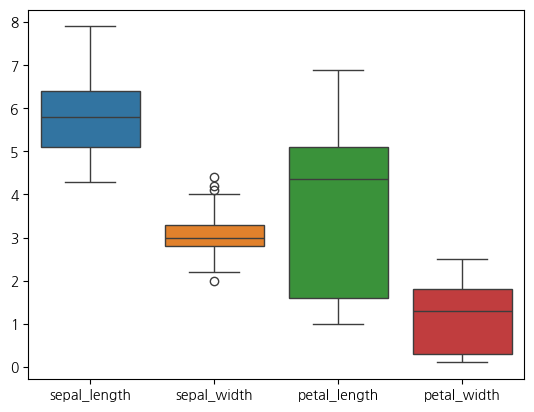

In [7]:
sns.boxplot(data)

In [8]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
X = data.drop('species', axis=1)
y = data['species']

### label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### one-hot encoding

In [11]:
y = pd.get_dummies(y)
y

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


### holdout

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_train

,0,1,2
22,True,False,False
15,True,False,False
65,False,True,False
11,True,False,False
42,True,False,False
...,...,...,...
71,False,True,False
106,False,False,True
14,True,False,False
92,False,True,False


### scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mms = MinMaxScaler()
mms_X_train = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

## TensorFlow로 다중분류 분석하기

### Sequential API

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-05-16 06:19:40.645255: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 06:19:40.898221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-16 06:19:41.006375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-16 06:19:41.035892: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 06:19:41.263775: I tensorflow/core/platform/cpu_feature_guar

In [18]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax')) # target이 3개라 3으로!!
model.summary()

I0000 00:00:1747376384.648276      31 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747376384.727021      31 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747376384.727074      31 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747376384.729734      31 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747376384.729836      31 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

## 다중분류의 경우 사용하는 loss
1) categorical_crossentropy : 종속변수의 클래스가 3개 이상인 경우, one-hot encoding된 경우
2) sparse_categorical_crossentropy : 종속변수의 클래스가 3개 이상인 경우, label encoding된 경우

In [19]:
# y_test.flatten()

Epoch 1/100


I0000 00:00:1747376386.061710     816 service.cc:146] XLA service 0x7f943c0051d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747376386.061784     816 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-16 06:19:46.126174: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-16 06:19:46.264952: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


1/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3125 - loss: 1.1460

I0000 00:00:1747376388.293116     816 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.3237 - loss: 1.1508 - val_accuracy: 0.3333 - val_loss: 1.1341
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3867 - loss: 1.1134 - val_accuracy: 0.3333 - val_loss: 1.1080
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3230 - loss: 1.0991 - val_accuracy: 0.3333 - val_loss: 1.0870
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3062 - loss: 1.0806 - val_accuracy: 0.3333 - val_loss: 1.0686
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3409 - loss: 1.0665 - val_accuracy: 0.5000 - val_loss: 1.0541
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5563 - loss: 1.0440 - val_accuracy: 0.5333 - val_loss: 1.0420
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5850 - loss: 1.0359 - val_accuracy: 0.5667 - val_loss: 1.0279
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5839 - loss: 1.0126 - val_accuracy: 0.5667 - val_loss: 1.0156
Epoch 9/10

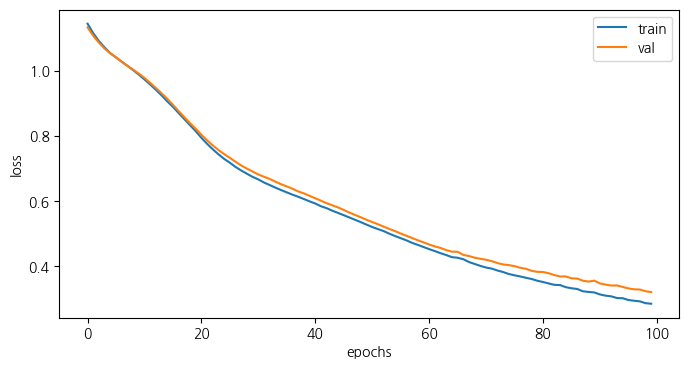

,0,1,2,0,1,2
73,False,True,False,0.014964,0.882393,0.102643
18,True,False,False,0.999212,0.000150,0.000638
118,False,False,True,0.175242,0.282230,0.542528
78,False,True,False,0.021866,0.841640,0.136494
76,False,True,False,0.049256,0.703741,0.247003
31,True,False,False,0.997281,0.000692,0.002027
64,False,True,False,0.011805,0.933634,0.054561
141,False,False,True,0.175242,0.282230,0.542528
68,False,True,False,0.139681,0.375931,0.484389
82,False,True,False,0.005720,0.945020,0.049261


In [20]:
model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result

### Functional API

In [21]:
from tensorflow.keras.models import Model

In [22]:
inputs = Input(shape=(mms_X_train.shape[1],))

x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)

# 출력층
outputs = Dense(3, activation='softmax')(x)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.3337 - loss: 1.1047 - val_accuracy: 0.3333 - val_loss: 1.0973
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3717 - loss: 1.0964 - val_accuracy: 0.3333 - val_loss: 1.0949
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3683 - loss: 1.0968 - val_accuracy: 0.3333 - val_loss: 1.0927
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3051 - loss: 1.0928 - val_accuracy: 0.3333 - val_loss: 1.0903
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4055 - loss: 1.0898 - val_accuracy: 0.3333 - val_loss: 1.0880
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2997 - loss: 1.0903 - val_accuracy: 0.3667 - val_loss: 1.0853
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3935 - loss: 1.0844 - val_accuracy: 0.4333 - val_loss: 1.0815
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4215 - loss: 1.0807 - val_accuracy: 0.5000 - val_loss: 1.076

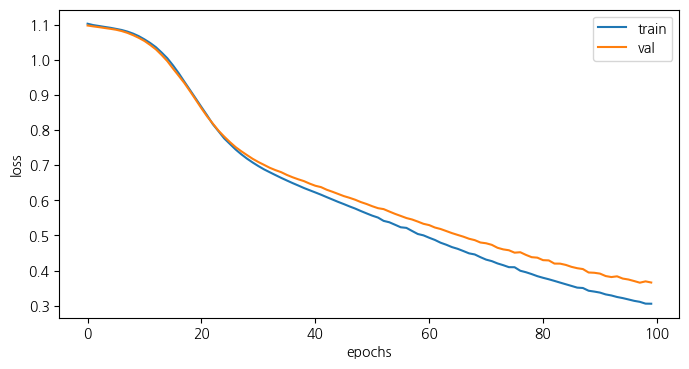

,0,1,2,0,1,2
73,False,True,False,0.079307,0.861187,0.059506
18,True,False,False,0.998077,0.001919,0.000004
118,False,False,True,0.159554,0.321457,0.518990
78,False,True,False,0.096012,0.814689,0.089299
76,False,True,False,0.111234,0.764466,0.124300
31,True,False,False,0.995201,0.004780,0.000019
64,False,True,False,0.049534,0.937849,0.012618
141,False,False,True,0.159554,0.321457,0.518990
68,False,True,False,0.161463,0.384941,0.453596
82,False,True,False,0.050300,0.925863,0.023837


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result

### Subclass API

In [24]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.dense3 = Dense(4, activation='relu')
        self.classifier = Dense(3, activation='softmax')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.3173 - loss: 1.0952 - val_accuracy: 0.4333 - val_loss: 1.0828
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5162 - loss: 1.0831 - val_accuracy: 0.4000 - val_loss: 1.0770
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3724 - loss: 1.0824 - val_accuracy: 0.3667 - val_loss: 1.0726
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3862 - loss: 1.0748 - val_accuracy: 0.3667 - val_loss: 1.0678
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4158 - loss: 1.0718 - val_accuracy: 0.4000 - val_loss: 1.0609
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4497 - loss: 1.0649 - val_accuracy: 0.4333 - val_loss: 1.0499
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4923 - loss: 1.0541 - val_accuracy: 0.6333 - val_loss: 1.0373
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6314 - loss: 1.0467 - val_accuracy: 0.6333 - val_loss: 1.02

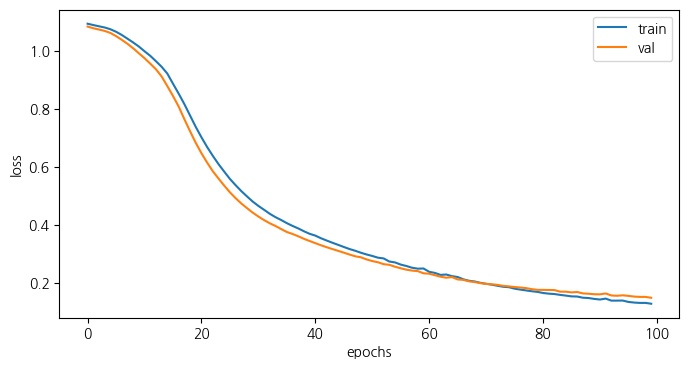

,0,1,2,0,1,2
73,False,True,False,3.250684e-03,0.935084,6.166488e-02
18,True,False,False,9.947687e-01,0.005231,2.624933e-08
118,False,False,True,8.083316e-08,0.008307,9.916925e-01
78,False,True,False,1.705946e-03,0.846590,1.517036e-01
76,False,True,False,5.127595e-04,0.648663,3.508238e-01
31,True,False,False,9.887206e-01,0.011279,2.242955e-07
64,False,True,False,1.190456e-02,0.972932,1.516299e-02
141,False,False,True,1.252264e-06,0.025585,9.744135e-01
68,False,True,False,1.022906e-04,0.142684,8.572134e-01
82,False,True,False,7.712103e-03,0.957011,3.527641e-02


In [25]:
model = Iris()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result